In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import dhlab.graph_networkx_louvain as gnl

In [57]:
ndt_nob = pd.read_csv('NDT/ndt_nob.csv', index_col = 0)

In [33]:
#ndt_nob.columns = "index fullform lemma pos pos1 feature head rel n m".split()

In [34]:
#ndt_nob['sentence_id'] = 1

In [58]:
ndt_nob.columns

Index(['token_id', 'token_order', 'form', 'lemma', 'pos', 'feats', 'head',
       'deprel', 'sent_id', 'ud_id', 'language_code', 'data_split', 'newpar',
       'document_id'],
      dtype='object')

In [102]:
ndt_nob

,token_id,token_order,form,lemma,pos,feats,head,deprel,sent_id,ud_id,language_code,data_split,newpar,document_id,diffs
0,1,1,Lam,lam,subst,appell|nøyt|ub|ent,0.0,FRAG,1.0,1.0,nb-NO,train,0.0,NaN,1.0
1,2,2,og,og,konj,<ikke-clb>,3.0,KONJ,1.0,1.0,nb-NO,train,0.0,NaN,1.0
2,3,3,piggvar,piggvar,subst,appell|mask|ub|ent,1.0,KOORD,1.0,1.0,nb-NO,train,0.0,NaN,2.0
3,4,4,på,på,prep,NaN,1.0,SPRED,1.0,1.0,nb-NO,train,0.0,NaN,3.0
4,5,5,bryllupsmenyen,bryllupsmeny,subst,appell|mask|be|ent|samset,4.0,PUTFYLL,1.0,1.0,nb-NO,train,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70344,70345,2,både,både,konj,<ikke-clb>|<adv>,3.0,KONJ,4310.0,4310.0,nb-NO,train,0.0,NaN,70342.0
70345,70346,3,nikotin-,nikotin-,subst,ufl,6.0,SUBJ,4310.0,4310.0,nb-NO,train,0.0,NaN,70340.0
70346,70347,4,og,og,konj,<ikke-clb>,5.0,KONJ,4310.0,4310.0,nb-NO,train,0.0,NaN,70342.0
70347,70348,5,THC-innholdet,THC-innhold,subst,appell|nøyt|be|ent|samset,3.0,KOORD,4310.0,4310.0,nb-NO,train,0.0,NaN,70345.0


<AxesSubplot:xlabel='pos'>

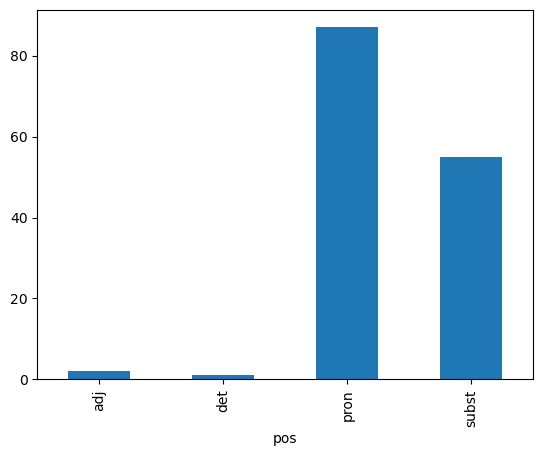

In [64]:
ndt_nob[ndt_nob['deprel'].isin(['IOBJ'])].groupby('pos')['token_id'].count().plot(kind='bar')

In [50]:
ndt_nob.columns[3]

'form'

<AxesSubplot:xlabel='pos'>

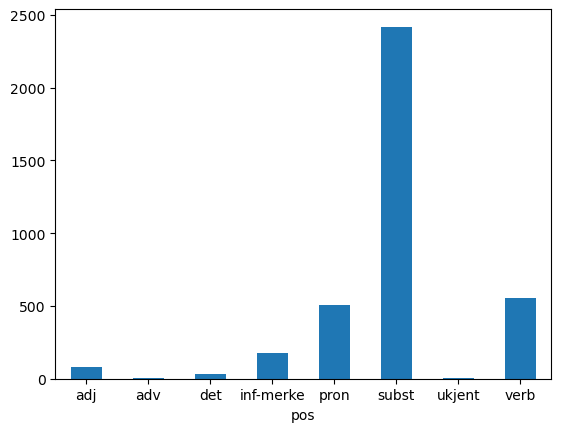

In [61]:
ndt_nob[ndt_nob['deprel'].isin(['DOBJ'])].groupby('pos')['token_id'].count().plot(kind='bar', rot = 0)

<AxesSubplot:xlabel='pos'>

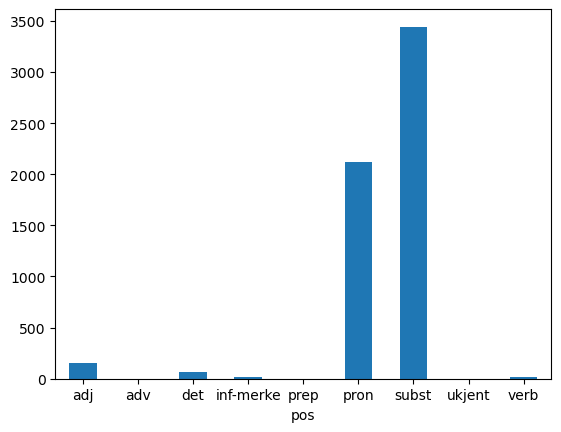

In [65]:
ndt_nob[ndt_nob['deprel'].isin(['SUBJ'])].groupby('pos')['token_id'].count().plot(kind='bar', rot = 0)

<AxesSubplot:xlabel='3'>

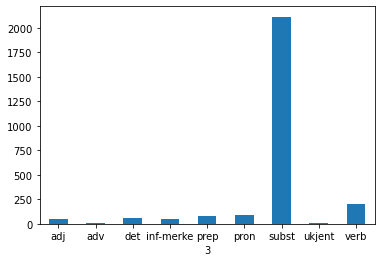

In [150]:
ndt_nob[ndt_nob[7].isin(['APP'])].groupby(3)[0].count().plot(kind='bar', rot = 0)

In [103]:
dist = ndt_nob[['deprel','head','token_order']].dropna()

In [104]:
dist.head(20)

,deprel,head,token_order
0,FRAG,0.0,1
1,KONJ,3.0,2
2,KOORD,1.0,3
3,SPRED,1.0,4
4,PUTFYLL,4.0,5
5,IP,1.0,6
6,SUBJ,6.0,1
7,IK,1.0,2
8,KOORD,1.0,3
9,KONJ,5.0,4


ndt = pd.DataFrame(columns = ['rel', 'head', 'dep'])
ndt['dep'] = dist[6].astype(int)
ndt['head'] = dist[0].astype(int)
ndt['rel'] = dist[7]

In [105]:
ndt = ndt_nob

In [110]:
diffs = abs(ndt[['token_order', 'head']].diff(axis = 1)['head'])

In [111]:
diffs

0        1.0
1        1.0
2        2.0
3        3.0
4        1.0
        ... 
70344    1.0
70345    3.0
70346    1.0
70347    2.0
70348    NaN
Name: head, Length: 70349, dtype: float64

In [112]:
ndt['diffs'] = diffs

In [113]:
ndt.groupby('deprel').mean()

,token_id,token_order,head,sent_id,ud_id,newpar,document_id,diffs
deprel,,,,,,,,
ADV,35063.765740,11.063555,10.454717,2157.053029,2157.053029,0.114499,NaN,2.634657
APP,27710.405405,11.710652,11.166932,1705.847377,1705.847377,0.201908,NaN,2.664547
ATR,36223.808681,12.544981,12.141610,2228.828080,2228.828080,0.137973,NaN,1.483390
DET,35522.923151,11.236725,12.706121,2185.495462,2185.495462,0.127631,NaN,1.511103
DOBJ,36019.515208,12.569426,10.338006,2215.257604,2215.257604,0.119545,NaN,2.387993
FINV,35211.832596,4.309034,0.000000,2166.076803,2166.076803,0.128092,NaN,4.309034
FLAT,29725.806738,11.137411,9.765071,1828.739362,1828.739362,0.209220,NaN,1.450355
FOBJ,14893.800000,10.400000,9.400000,916.200000,916.200000,0.300000,NaN,1.000000
FOPRED,37778.695652,17.304348,13.956522,2326.913043,2326.913043,0.130435,NaN,3.869565


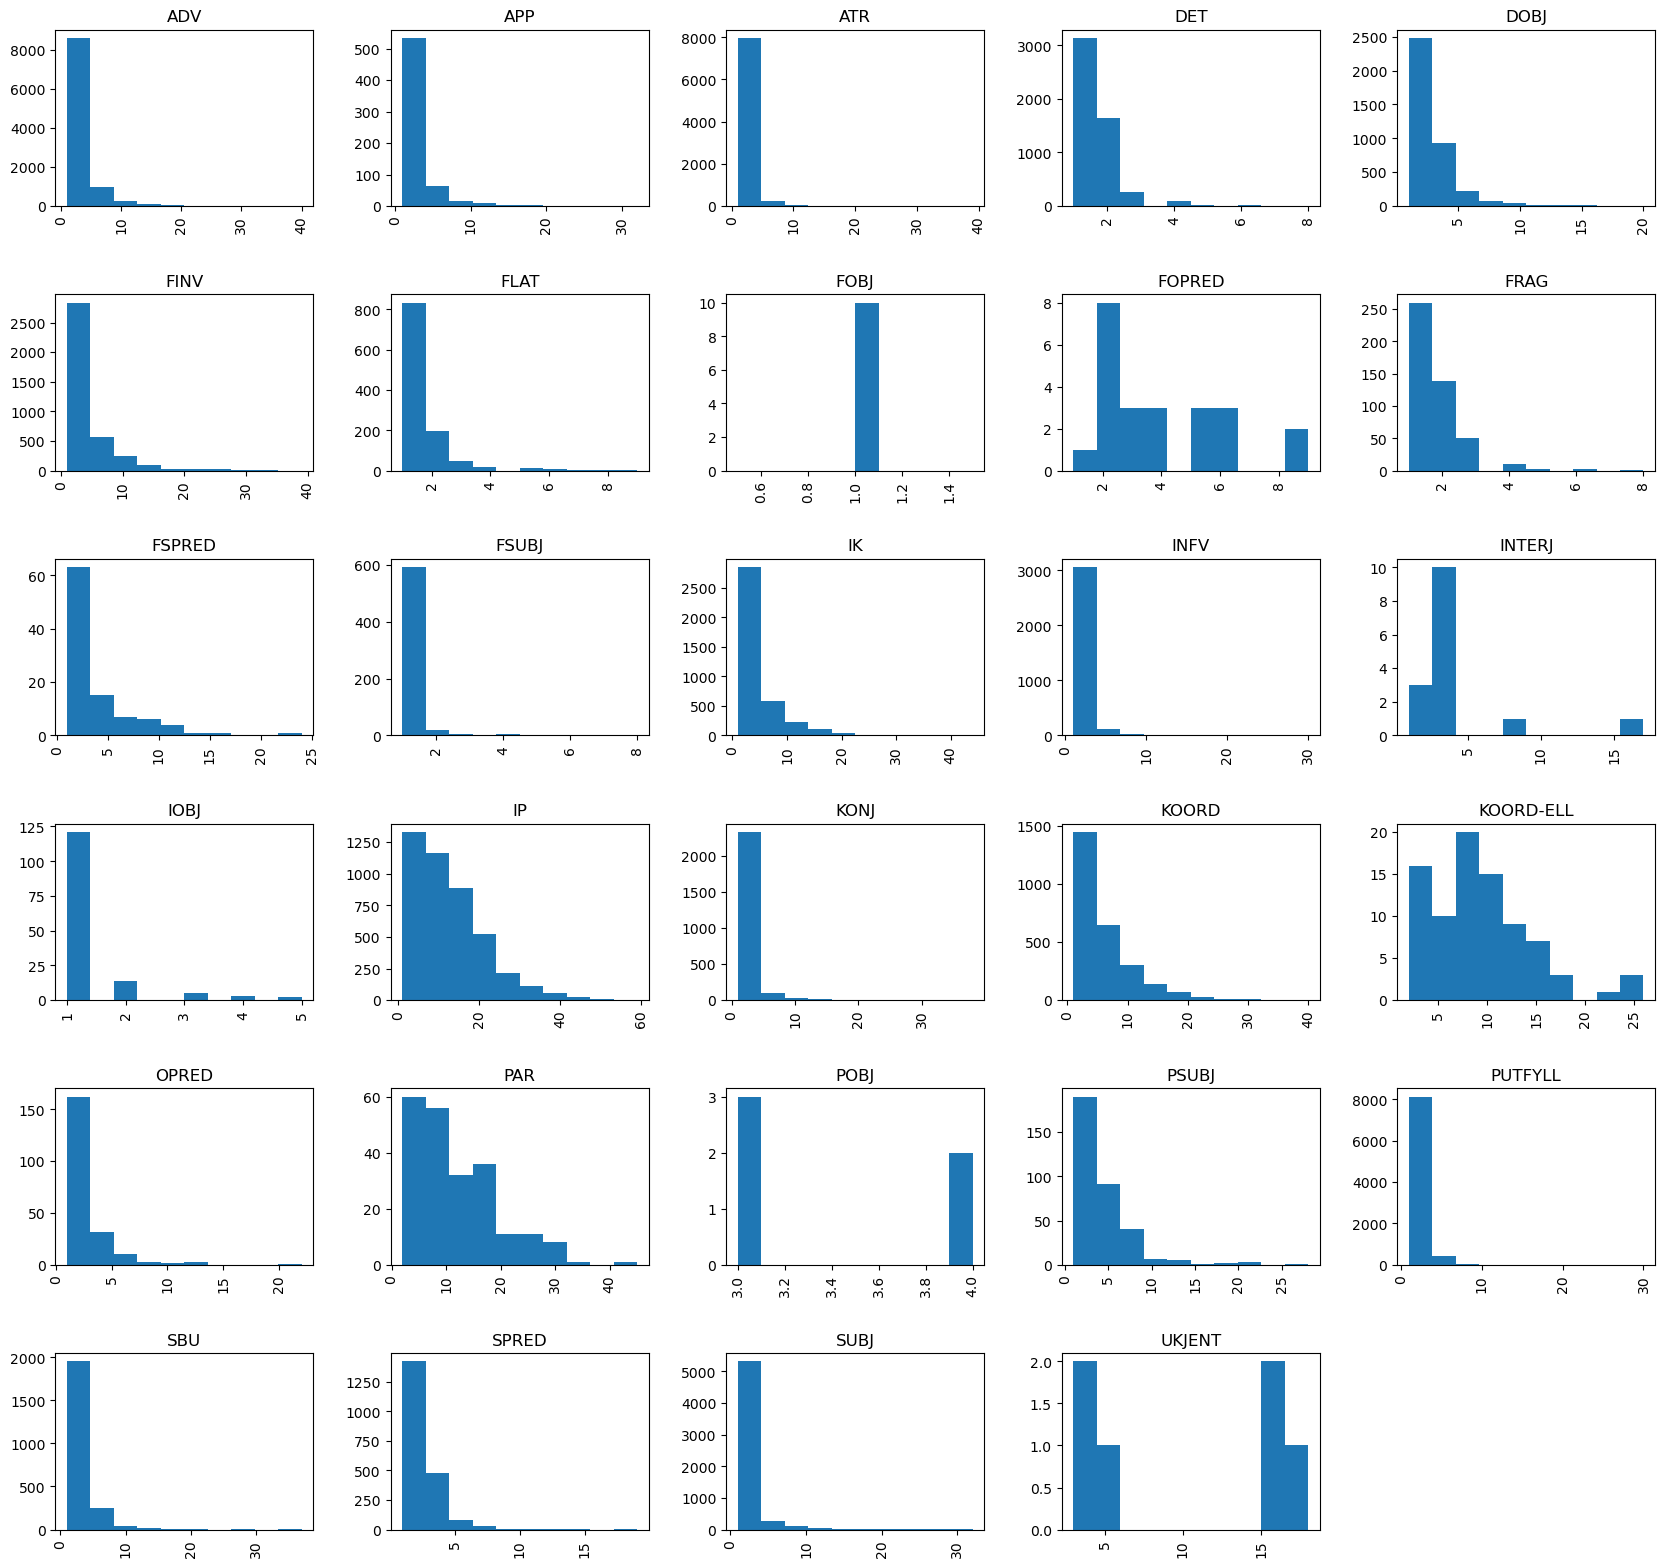

In [114]:
ndt_hist = ndt[['deprel','diffs']].hist(by = 'deprel', figsize = (20,20))
plt.savefig('ndt_distance.jpg')

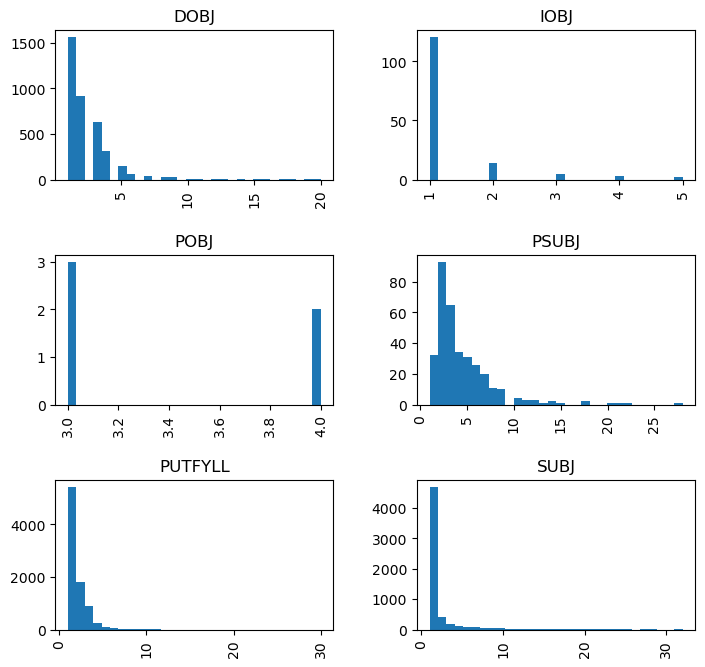

In [115]:
ndt_hist = ndt[['deprel','diffs']][ndt.deprel.isin(['SUBJ', 'DOBJ', 'IOBJ', 'PUTFYLL', 'POBJ', 'PSUBJ'])].hist(by = 'deprel', bins = 30, figsize = (8,8))
plt.savefig('ndt_distance3.jpg')

In [241]:
sentences = list({int(x) for x in ndt.sent_id.dropna()})

In [242]:
max(sentences)

4310

In [252]:
ff = dict()
lf = dict()
for i in sentences:
    ff[i] = ' '.join([str(x) for x in ndt[ndt.sent_id == i].form])
    lf[i] = ' '.join([str(x) for x in ndt[ndt.sent_id == i].lemma])

In [259]:
pd.concat([pd.DataFrame.from_dict(ff, orient='index', columns=["form"]),
           pd.DataFrame.from_dict(lf, orient='index', columns=["lemma"])],
         axis = 1).to_csv("NDT/setninger.csv", index=True)

In [290]:
import graphviz

In [232]:
edges = ndt[ndt.sent_id == 200]["token_order head deprel".split()]
nodes = ndt[ndt.sent_id == 200]["token_order form".split()]

edgelist = [(int(e[1].token_order), int(e[1]['head']), {'name':e[1].deprel}) for e in edges.iterrows()]
nodelist = [(int(e[1].token_order), {'name':e[1]['form']}) for e in nodes.iterrows()] 

edgelist



nodelist

import networkx as nx

G = nx.DiGraph()

G.add_edges_from(edgelist)
G.add_nodes_from(nodelist)

G.nodes[0]['name'] = 'root'

G.nodes(data=True)

#options = {"edgecolors": "tab:gray", "node_size": 200, "width":3, "alpha": 0.3}
#nx.draw_networkx(G, with_labels=True, **options)

import matplotlib

G.nodes(data=True)

edgelabels = {(x[0], x[1]):x[2]['name'] for x in G.edges(data=True)}
nodelabels = {x[0]:x[1]['name'] for x in G.nodes(data=True)}

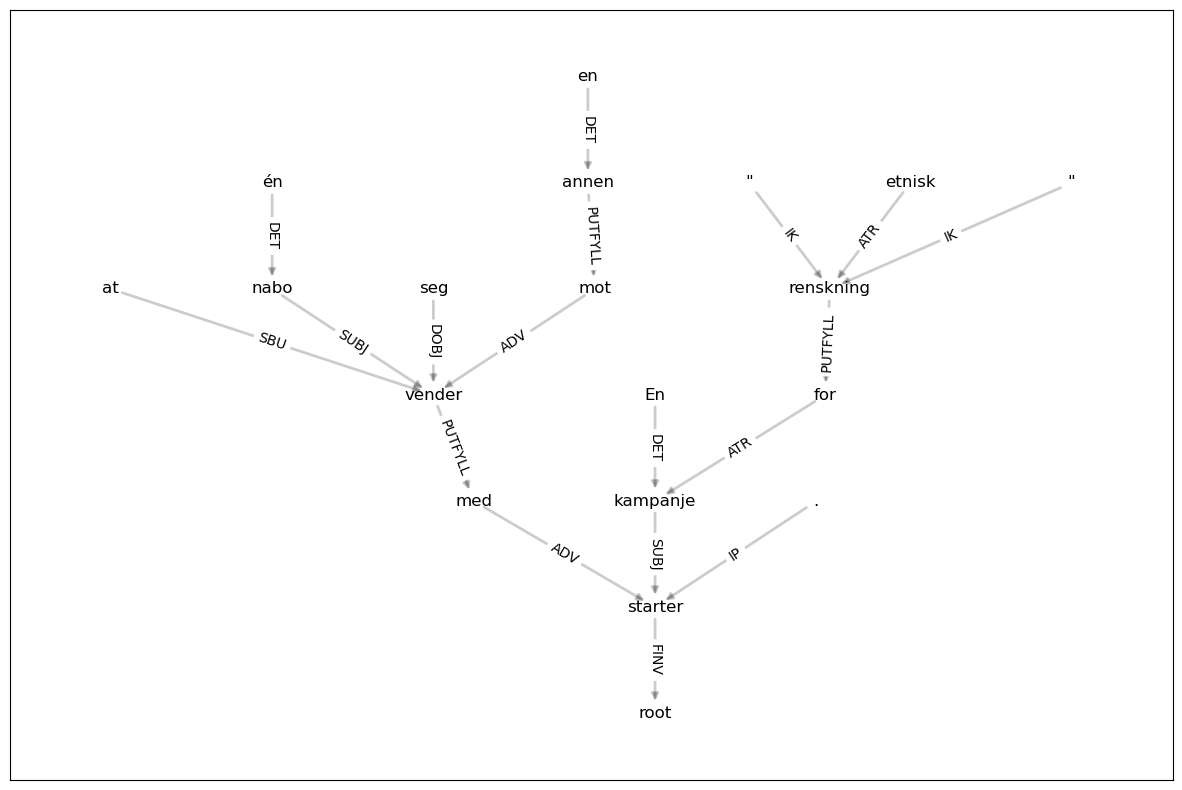

In [292]:
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 0, "alpha": 0.9}
n1 = list(G.nodes)[:int(len(list(G.nodes))/2)]
n2 = list(G.nodes)[int(len(list(G.nodes))/2):]
nx.draw_networkx_nodes(G, pos,nodelist = n1, node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos,nodelist = n2, node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.2, arrows=True);
nx.draw_networkx_edge_labels(G, pos, edge_labels = edgelabels, font_color='red');
nx.draw_networkx_labels(G, pos, labels = nodelabels, font_color='blue');

In [262]:
sent = pd.read_csv("NDT/setninger.csv", index_col = 0)

In [289]:
list(sent[sent['form'].str.contains("lam")].sample(1).index)[0]

3286